In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
data = pd.read_csv("Titanic-Dataset.csv")

In [58]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


##**NOMOR 1**
##**EKSPLORASI AWAL**

a. Berapa jumlah total penumpang dalam data?

Jawab: Berdasarkan hasil output diatas diperoleh total penumpang kapal titanic tersebut ada 891 penumpang.

b. Berapa jumlah penumpang yang selamat dan tidak selamat? Tampilkan dalam bentuk tabel dan grafik.

Jumlah yang selamat dan tidak selamat:
Survived
0    549
1    342


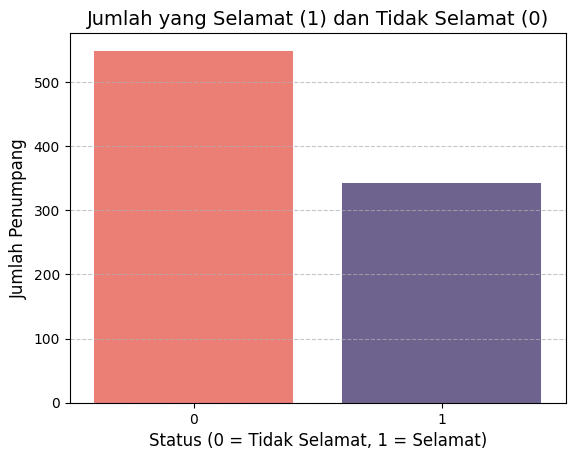

In [60]:
# Hitung jumlah yang selamat dan tidak selamat
survived_counts = data['Survived'].value_counts()
print("Jumlah yang selamat dan tidak selamat:")
print(survived_counts.to_string())

# Visualisasi
colors = ['#FF6F61', '#6B5B95']
sns.countplot(x='Survived', data=data, hue='Survived', palette=colors, legend=False)

plt.title('Jumlah yang Selamat (1) dan Tidak Selamat (0)', fontsize=14)
plt.xlabel('Status (0 = Tidak Selamat, 1 = Selamat)', fontsize=12)
plt.ylabel('Jumlah Penumpang', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Berdasarkan hasil output diatas, diperoleh bahwa banyaknya penumpang yang selamat ada 342 penumpang dan yang tidak selamat ada 549 penumpang.

c. Berapa rata-rata umur penumpang? Dan siapa penumpang termuda dan tertua?

In [61]:
print("\nRata-rata umur:", data['Age'].mean())
print("Penumpang termuda:", data['Age'].min())
print("Penumpang tertua:", data['Age'].max())
termuda = data['Age'].min()
tertua = data['Age'].max()
youngest_passenger = data.loc[data['Age'] == termuda, 'Name'].values[0]
oldest_passenger = data.loc[data['Age'] == tertua, 'Name'].values[0]
print(f"Nama penumpang termuda: {youngest_passenger}")
print(f"Nama penumpang tertua: {oldest_passenger}")


Rata-rata umur: 29.69911764705882
Penumpang termuda: 0.42
Penumpang tertua: 80.0
Nama penumpang termuda: Thomas, Master. Assad Alexander
Nama penumpang tertua: Barkworth, Mr. Algernon Henry Wilson


Berdasarkan hasil output diatas diperoleh bahwa rata-rata umur penumpang yaitu 29,69911764705882. Penumpang termuda ada Thomas dan Master. Assad Alexander. Penumpang tertua ada Barkworth dan Mr. Algernon Henry wilson.

d. Berapa jumlah penumpang berdasarkan jenis kelamin? Siapa yang lebih banyak? Visualisasikan.

Jawab:

Jumlah berdasarkan jenis kelamin:
Sex
male      577
female    314


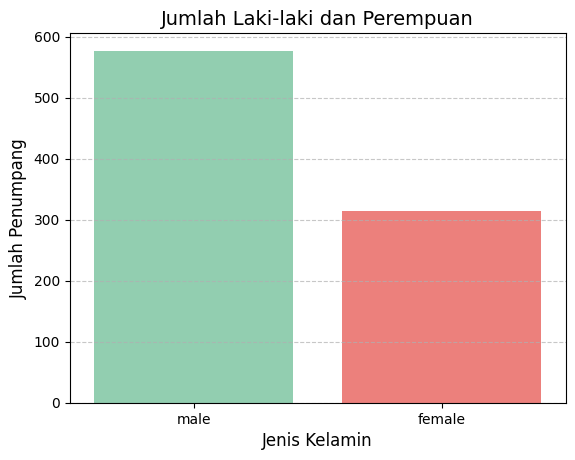

In [62]:
#Jumlah berdasarkan jenis kelamin
gender_counts = data['Sex'].value_counts()
print("Jumlah berdasarkan jenis kelamin:")
print(gender_counts.to_string())

# Visualisasi
colors = ['#88d8b0', '#ff6f69']
sns.countplot(x='Sex', data=data, hue='Sex', palette=colors, legend=False)

plt.title('Jumlah Laki-laki dan Perempuan', fontsize=14)
plt.xlabel('Jenis Kelamin', fontsize=12)
plt.ylabel('Jumlah Penumpang', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Berdasarkan hasil output diatas diperoleh bahwa jumlah penumpang berdasarkan jenis kelamin sebanyak 891 penumpang, dengan penumpang laki-laki sebanyak 577 orang dan penumpang perempuan sebanyak 314 orang.

e. Tampilkan jumlah penumpang berdasarkan kelas (Pclasc) dan berapa persen dari total data yang berada di kelas 1? Visualisasikan

Jawab:

 Kelas  Jumlah
     3     491
     1     216
     2     184


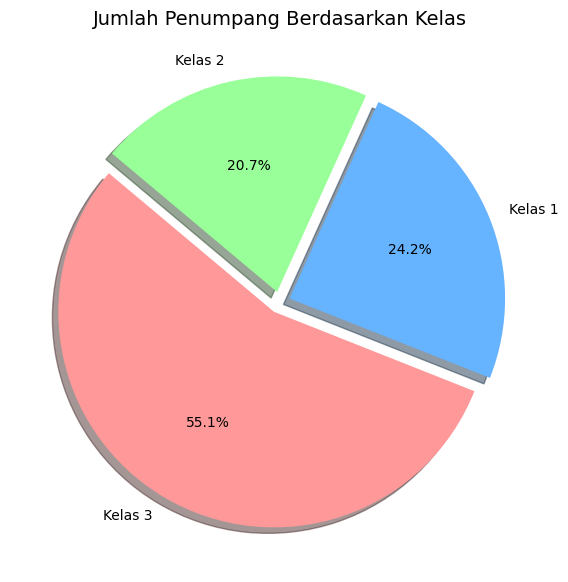

In [63]:
import matplotlib.pyplot as plt

#Jumlah penumpang berdasarkan kelas
tabel = data['Pclass'].value_counts().reset_index()
tabel.columns = ['Kelas', 'Jumlah']
print(tabel.to_string(index=False))

# Visualisasi
colors = ['#ff9999', '#66b3ff', '#99ff99']
plt.figure(figsize=(7, 7))
plt.pie(
    tabel['Jumlah'],
    labels=[f'Kelas {kelas}' for kelas in tabel['Kelas']],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    shadow=True
)
plt.title('Jumlah Penumpang Berdasarkan Kelas', fontsize=14)
plt.show()

Berdasarkan hasil output diperoleh, jumlah penumpang berdasarkan kelas ada 891 penumpang dengan jumlah penumpang yang ada di kelas 1 sebanyak 24,2%.

##**NOMOR 2**
##**PRE-PROCESSING**
a. Apakah ada missing value pada data?

In [64]:
# Cek missing values
print("\nCek Missing Values:")
print(data.isnull().sum())


Cek Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Berdasarkan hasil output diatas, terdapat missing value pada kolom 'Age' sebanyak 177 missing value, kolom 'Cabin' sebanyak 687 missing value, dan kolom 'Embarked' sebanyak 2 missing value.

b. Jika ya, apa yang anda lakukan?

Jawab: Menangani missing value tersebut pada setiap kolom yang terdapat missing value.

1. Kolom 'Age'

In [65]:
# Tangani missing values pada kolom 'Age' dengan mengganti NaN menjadi rata-rata umur
data['Age'] = data['Age'].fillna(data['Age'].mean())

2. Kolom 'Cabin'

In [66]:
# Tangani missing values pada kolom 'Cabin

# Drop kolom 'Cabin' karena banyak missing values
data = data.drop(columns=['Cabin'])


3. Kolom 'embarked'

In [67]:
# Tangani missing values pada kolom 'Embarked'
# Isi missing values pada kolom 'Embarked' dengan modus (nilai yang paling sering muncul)
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [68]:
# Cek ulang missing values
print("\nMissing Values Setelah Penanganan:")
print(data.isnull().sum())


Missing Values Setelah Penanganan:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


c. Apakah terdapat outlier pada data tersebut? jelaskan apa itu outlier!

Jawab: Outlier adalah nilai ekstrem yang menyimpang dari data lain dan dapat memengaruhi hasil analisis. Kehadiran outlier bisa membuat hasil analisis jadi tidak akurat. outlier juga bisa membuat grafik data terlihat aneh dan hasil uji statistik menjadi salah, sehingga kesimpulan yang diambil bisa keliru.

1. Boxplot

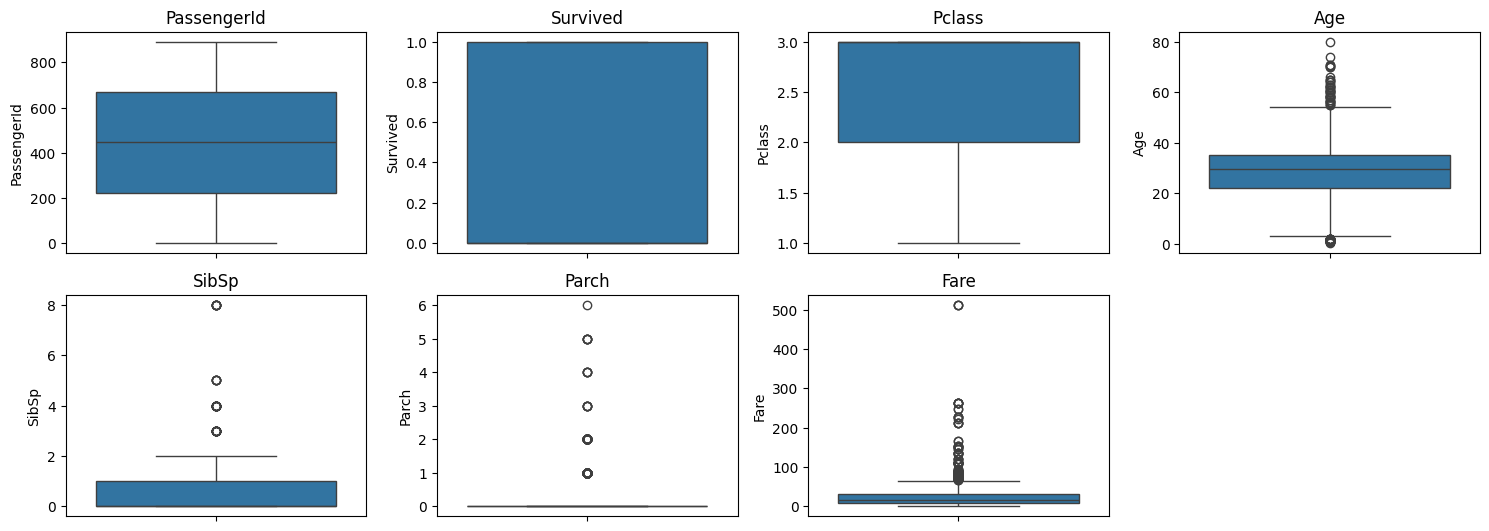

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

plt.figure(figsize=(15,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

2. IQR

In [70]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

PassengerId: 0 outliers
Survived: 0 outliers
Pclass: 0 outliers
Age: 66 outliers
SibSp: 46 outliers
Parch: 213 outliers
Fare: 116 outliers


Berdasarkan hasil output, diperoleh bahwa terdapat outliers pada beberapa kolom, seperti kolom 'Age' ada 66 outliers, kolom 'SibSp' ada 46 outliers, kolom 'Parch' ada 213 outliers, dan kolom 'Fare' ada 116 outliers.

d. Apakah outlier pada data tersebut perlu diatasi serta bagaimana cara mengatasinya?

Jawab: Outlier perlu diatasi agar hasil analisis menjadi akurat. Metode yang dipakai adalah Winsorizing (mengganti outlier dengan batas IQR)

In [71]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

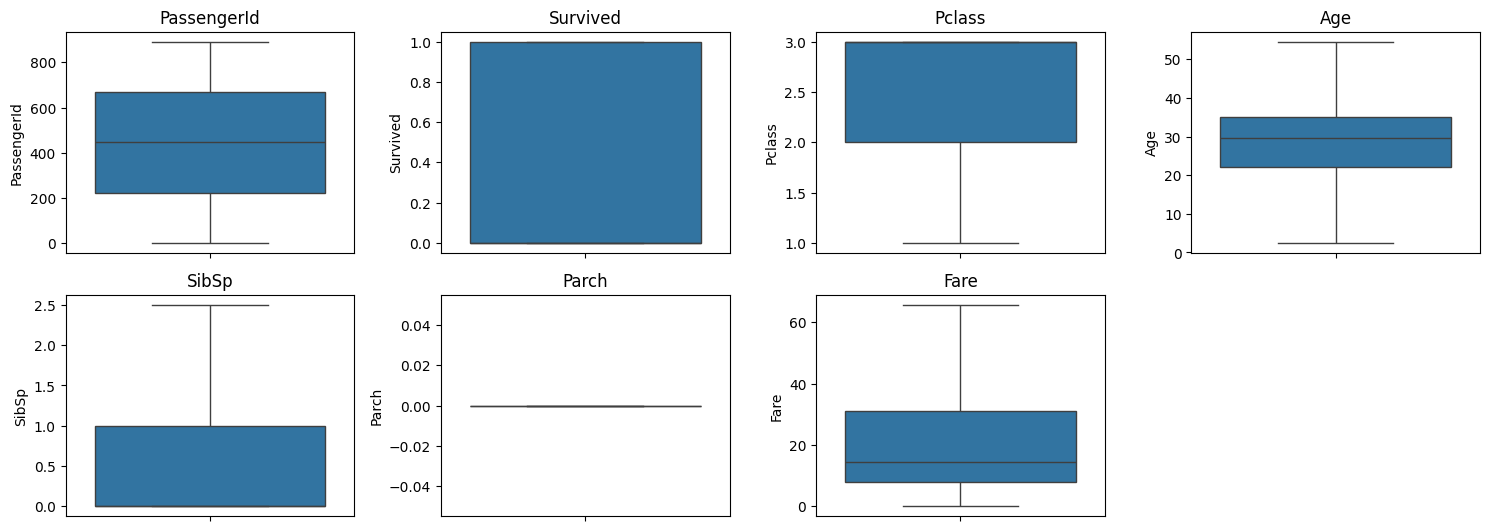

In [72]:
# Cek boxplot kembali
num_cols = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

plt.figure(figsize=(15,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

e. Jika dibutuhkan silahkan lakukan transformasi/standarisasi/scalling terhadap data tersebut

Jawab: Encoding merupakan proses transformasi yang mengubah data kategorik menjadi numerik agar dapat digunakan dalam Machine Learning. Pada data ini yang perlu dilakukan encoding adalah kolom 'Sex' dan 'Embarked'.

In [73]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [74]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])

In [75]:
data['Sex'].unique()

array([1, 0])

In [76]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [77]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Embarked']=le.fit_transform(data['Embarked'])

In [78]:
data['Embarked'].unique()

array([2, 0, 1])

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 76.7+ KB


##**NOMOR 3**
##**MODELLING**

a. Jelaskan proses pembagian data menjadi data training dan testing dan alasan mengapa perlu membagi data tersebut

Jawab: Proses train/test membagi data menjadi dua bagian: data pelatihan (train) untuk melatih model, dan data pengujian (test) untuk mengevaluasi kinerjanya. Pada kode di atas, LabelEncoder digunakan untuk mengubah data kategorikal ('Sex' dan 'Embarked') menjadi format numerik agar bisa diproses oleh model.

In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_test = sc.fit_transform(data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']])
print(data_test)

[[-0.78927234  0.82737724  0.73769513 ...  0.         -0.82055245
   0.58595414]
 [ 1.2669898  -1.56610693 -1.35557354 ...  0.          2.03162322
  -1.9423032 ]
 [ 1.2669898   0.82737724 -1.35557354 ...  0.         -0.78757757
   0.58595414]
 ...
 [-0.78927234  0.82737724 -1.35557354 ...  0.         -0.02915533
   0.58595414]
 [ 1.2669898  -1.56610693  0.73769513 ...  0.          0.29082313
  -1.9423032 ]
 [-0.78927234  0.82737724  0.73769513 ...  0.         -0.79612661
  -0.67817453]]


b. Berapa persen pembagiannya? Mengapa memilih membagi dengan proporsi tersebut?

Jawab: Dalam kasus ini, saya memilih membagi dengan proporsi 80%:20% dengan alasan karena umum digunakan dan data tersebut merupakan data yang besar.

In [81]:
from sklearn.model_selection import train_test_split
#menghilangkan data object
data=data.drop(['PassengerId','Name','Ticket'],axis=1)

X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')


Total # of sample in whole dataset: 891
Total # of sample in train dataset: 712
Total # of sample in test dataset: 179


In [83]:
print(X_train)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
331     1.0    1  45.500000    0.0    0.0  28.5000         2
733     2.0    1  23.000000    0.0    0.0  13.0000         2
382     3.0    1  32.000000    0.0    0.0   7.9250         2
704     3.0    1  26.000000    1.0    0.0   7.8542         2
813     3.0    0   6.000000    2.5    0.0  31.2750         2
..      ...  ...        ...    ...    ...      ...       ...
106     3.0    0  21.000000    0.0    0.0   7.6500         2
270     1.0    1  29.699118    0.0    0.0  31.0000         2
860     3.0    1  41.000000    2.0    0.0  14.1083         2
435     1.0    0  14.000000    1.0    0.0  65.6344         2
102     1.0    1  21.000000    0.0    0.0  65.6344         2

[712 rows x 7 columns]


In [84]:
print(y_train)

331    0.0
733    0.0
382    0.0
704    0.0
813    0.0
      ... 
106    1.0
270    0.0
860    0.0
435    1.0
102    0.0
Name: Survived, Length: 712, dtype: float64


In [85]:
print(X_test)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
709     3.0    1  29.699118    1.0    0.0  15.2458         0
439     2.0    1  31.000000    0.0    0.0  10.5000         2
840     3.0    1  20.000000    0.0    0.0   7.9250         2
720     2.0    0   6.000000    0.0    0.0  33.0000         2
39      3.0    0  14.000000    1.0    0.0  11.2417         0
..      ...  ...        ...    ...    ...      ...       ...
433     3.0    1  17.000000    0.0    0.0   7.1250         2
773     3.0    1  29.699118    0.0    0.0   7.2250         0
25      3.0    0  38.000000    1.0    0.0  31.3875         2
84      2.0    0  17.000000    0.0    0.0  10.5000         2
10      3.0    0   4.000000    1.0    0.0  16.7000         2

[179 rows x 7 columns]


In [86]:
print(y_test)

709    1.0
439    0.0
840    0.0
720    1.0
39     1.0
      ... 
433    0.0
773    0.0
25     1.0
84     1.0
10     1.0
Name: Survived, Length: 179, dtype: float64


c. Buatlah model klasifikasi dari 3 algoritma yang berbeda. Jelaskan masing-masing model dan cara kerjanya

Jawab:

1. Model KNN

Model K-Nearest Neighbors (KNN) dalam data mining adalah algoritma klasifikasi yang bekerja dengan mengklasifikasikan sebuah data baru berdasarkan kemiripannya dengan sejumlah data tetangga terdekat pada data latih. Cara kerjanya dimulai dengan menentukan nilai K, yaitu jumlah tetangga terdekat yang akan diperhitungkan dalam pengambilan keputusan klasifikasi. Selanjutnya, algoritma menghitung jarak antara data baru dengan setiap data dalam set pelatihan menggunakan metrik jarak seperti Euclidean distance. Setelah jarak dihitung, KNN memilih K data dengan jarak terdekat sebagai tetangga. Kelas data baru kemudian ditentukan berdasarkan kelas mayoritas dari tetangga-tetangga tersebut. Dengan kata lain, data baru akan diklasifikasikan ke dalam kelas yang paling banyak muncul di antara K tetangga terdekatnya. Algoritma ini bersifat non-parametrik dan lazy learning, yang berarti tidak membuat model eksplisit selama fase pelatihan dan menggunakan data latih secara langsung saat klasifikasi. KNN sangat bergantung pada pemilihan nilai K yang tepat; nilai K yang kecil dapat membuat model sensitif terhadap noise, sementara nilai K yang besar dapat menyebabkan bias dan batas klasifikasi menjadi kurang jelas. Secara umum, KNN efektif untuk data dengan dimensi rendah dan jumlah data yang tidak terlalu besar karena perhitungan jarak yang intensif

In [99]:
from math import sqrt
class KNN():
  def __init__(self,k):
    self.k=k
    print(self.k)
  def fit(self,X_train,y_train):
    self.x_train=X_train
    self.y_train=y_train
  def calculate_euclidean(self,sample1,sample2):
    distance=0.0
    for i in range(len(sample1)):
      distance+=(sample1[i]-sample2[i])**2 #Euclidean Distance = sqrt(sum i to N (x1_i-x2_i)^2)
    return sqrt(distance)
  def nearest_neighbors(self,test_sample):
    distances=[] #calculate distances from a test sample to every sample in a training set
    for i in range(len(self.x_train)):
      distances.append((self.y_train[i],self.calculate_euclidean(self.x_train[i],test_sample)))
    distances.sort(key=lambda x:x[1]) #sort in ascending order, based on a distance value
    neighbors=[]
    for i in range(self.k): #get fist k samples
      neighbors.append(distances[i][0])
    return neighbors
  def predict(self,test_set):
    predictions=[]
    for test_sample in test_set:
      neigbors=self.nearest_neighbors(test_sample)
      labels=[sample for sample in neighbors]
      prediction=max(labels,key=labels.count)
      predictions.append(prediction)
    return predictions

In [100]:
model=KNN(5)
model.fit(X_train,y_train)

5


In [101]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [102]:
model = []
model.append(('KNN', KNeighborsClassifier()))

In [103]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#definisikan nilai K dan buat objek KNN regressor
k = 3
knn = KNeighborsRegressor(n_neighbors=k)

#fitkan model KNN ke data train
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [104]:
# Lakukan prediksi pada data train dan dataset
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [105]:
#Hitung MSE untuk data train dan data test
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

In [106]:
print("MSE data train:", mse_train)
print("MSE data test:", mse_test)

MSE data train: 0.10799001248439452
MSE data test: 0.24084419615145874


Hasil Prediksi berdasarkan perhitungan Mean Squared Error

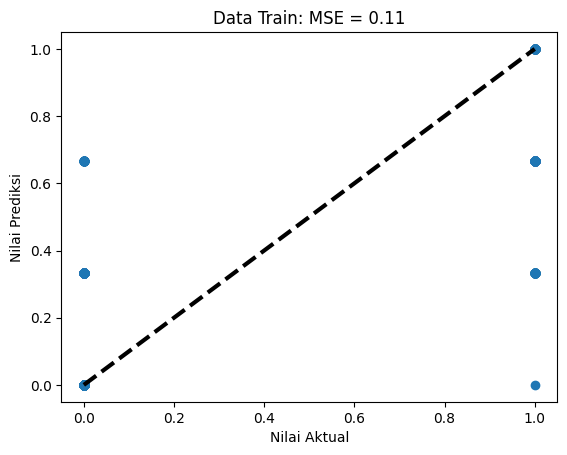

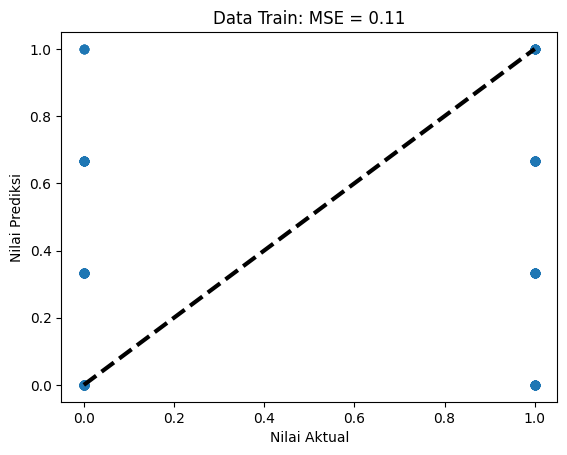

In [107]:
# Plot data train
plt.scatter(y_train, y_pred_train)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=3)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Data Train: MSE = %.2f' % mse_train)
plt.show()

# Plot dataset
plt.scatter(y_test, y_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Data Train: MSE = %.2f' % mse_train)
plt.show()

Hasil evaluasi dan Confusion Matriks

In [108]:
y_pred = classifier.predict(X_test)

In [112]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[84 21]
 [32 42]]


0.7039106145251397

Berdasarkan hasil output diatas, diperoleh bahwa nilai akurasi model KNN adalah 70,39%. Pada confusion matrix diperoleh bahwa sebanyak 84 penumpang dinyatakan benar tidak selamat, 21 penumpang dinyatakan tidak selamat tetapi sebenarnya selamat, 32 penumpang dinyatakan selamat tetapi sebenarnya tidak selamat, dan 42 penumpang dinyatakan benar selamat.

2. Naive Bayes
Model Naive Bayes adalah salah satu algoritma klasifikasi dalam data mining yang bekerja berdasarkan prinsip probabilitas sederhana dari Teorema Bayes, dengan asumsi bahwa setiap fitur atau atribut pada data bersifat independen satu sama lain. Dalam penerapannya, model ini menghitung probabilitas setiap kelas berdasarkan data historis, yaitu dengan mengamati frekuensi kemunculan nilai atribut dan kombinasi atribut pada setiap kelas. Ketika dihadapkan pada data baru, model akan menghitung probabilitas bersyarat untuk masing-masing kelas dan memilih kelas dengan probabilitas tertinggi sebagai hasil prediksi. Proses ini membuat Naive Bayes sangat efisien dan cepat, serta dapat digunakan untuk berbagai jenis data, baik kuantitatif maupun kualitatif. Karena kesederhanaannya, model ini sering digunakan untuk tugas-tugas klasifikasi seperti deteksi spam atau analisis sentimen, meskipun asumsi independensi antar fitur kadang tidak sepenuhnya terpenuhi dalam data nyata.

In [113]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
nb = GaussianNB()

In [114]:
nb.fit(X_train, y_train)

GaussianNB()

In [115]:
nb.score(X_train, y_train)

0.7612359550561798

In [116]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [117]:
m = confusion_matrix(y_test, y_predict['NB'])
print(cm)

for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

[[84 21]
 [32 42]]
NB accuracy = 0.7654


Berdasarkan hasil output diatas, diperoleh bahwa nilai akurasi model Naive Bayes adalah 76,54%. Pada confusion matrix diperoleh bahwa sebanyak 84 penumpang dinyatakan benar tidak selamat, 21 penumpang dinyatakan tidak selamat tetapi sebenarnya selamat, 32 penumpang dinyatakan selamat tetapi sebenarnya tidak selamat, dan 42 penumpang dinyatakan benar selamat.

3. Neural Network
Model neural network adalah sistem komputasi yang terinspirasi dari cara kerja otak manusia, di mana jaringan terdiri dari sejumlah node atau neuron buatan yang terhubung satu sama lain. Pada data mining, neural network digunakan untuk memodelkan hubungan yang kompleks dan non-linear antara input dan output, sehingga mampu menemukan pola tersembunyi dalam data yang besar dan beragam. Cara kerjanya dimulai dengan menerima data pada lapisan input, kemudian data tersebut diproses secara bertahap melalui satu atau lebih lapisan tersembunyi, di mana setiap neuron melakukan perhitungan matematis berdasarkan bobot dan fungsi aktivasi tertentu. Proses ini disebut forward propagation, yaitu aliran data dari input ke output. Setelah menghasilkan prediksi, neural network menghitung selisih antara hasil prediksi dan nilai sebenarnya menggunakan fungsi loss. Selisih ini digunakan dalam proses backpropagation untuk memperbarui bobot-bobot jaringan secara otomatis, sehingga model dapat belajar dan meningkatkan akurasinya dari waktu ke waktu. Dengan mekanisme ini, neural network sangat efektif dalam berbagai tugas data mining seperti klasifikasi, prediksi, pengenalan pola, dan segmentasi data, terutama ketika hubungan antar data bersifat rumit dan tidak dapat dijelaskan dengan metode statistik sederhana.

In [118]:
#Menguji parameter yang paling optimum untuk model

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

# Tentukan parameter yang ingin diuji
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300]
}

# Buat model MLPClassifier
clf = MLPClassifier(random_state=100)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=cv_strategy)
# cv merupakan jumlah lipatan validasi silang (cross-validation)

# Lakukan pencarian grid pada data training
grid_search.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=MLPClassifier(random_state=100),
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 30),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200, 300]})

In [119]:
#Tampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'hidden_layer_sizes': (50, 30), 'learning_rate_init': 0.01, 'max_iter': 200}


In [120]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100,),learning_rate_init=0.01,max_iter=200)

clf.fit(X_train, y_train)

MLPClassifier(learning_rate_init=0.01)

In [121]:
y_pred = clf.predict(X_test)

In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.78      0.80       105
         1.0       0.71      0.74      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [123]:
from sklearn.metrics import accuracy_score
round(accuracy_score(y_test,y_pred),3)

0.765

In [124]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[82 23]
 [19 55]]


Berdasarkan hasil output diatas, diperoleh bahwa nilai akurasi model Neural Network adalah 76.5%. Pada confusion matrix diperoleh bahwa sebanyak 82 penumpang dinyatakan benar tidak selamat, 23 penumpang dinyatakan meninggal tetapi sebenarnya selamat, 19 penumpang dinyatakan selamat tetapi sebenarnya tidak selamat, dan 55 penumpang dinyatakan benar selamat.

In [125]:
# Evaluasi
from sklearn.metrics import accuracy_score, classification_report

print("\nAkurasi KNN:", accuracy_score(y_test, y_pred_nb))
print("\nAkurasi Naive Bayes:", accuracy_score(y_test, y_pred_dt))
print("\nAkurasi Neural Network:", accuracy_score(y_test, y_pred_lr))


Akurasi KNN: 0.7653631284916201

Akurasi Naive Bayes: 0.7597765363128491

Akurasi Neural Network: 0.7988826815642458


d. Berapa niai evaluasi dari masing-masing model pada data uji? Apa arti dari masing-masingmetrix evaluasi tersebut?

jawab:
Berdasarkan hasil evaluasi pada data uji, diperoleh akurasi sebagai berikut: model K-Nearest Neighbors (KNN) memiliki akurasi sebesar 76,54%, Naive Bayes memiliki akurasi 75,98%, dan Neural Network memiliki akurasi sebesar 79,89%. Nilai akurasi menunjukkan seberapa besar persentase prediksi model yang benar terhadap keseluruhan data uji. Artinya, semakin tinggi akurasi, semakin baik pula model tersebut dalam memprediksi data baru yang belum pernah dilihat sebelumnya.

Dalam evaluasi model, metrik akurasi digunakan untuk mengukur proporsi jumlah prediksi yang tepat dibandingkan dengan jumlah keseluruhan data. Selain akurasi, evaluasi model biasanya juga dilengkapi dengan metrik lain seperti precision, recall, dan F1-score. Precision mengukur seberapa tepat prediksi positif yang dibuat oleh model, yaitu dari semua prediksi positif, berapa banyak yang benar-benar positif. Recall mengukur kemampuan model dalam menemukan semua kasus positif di dalam data. Sedangkan F1-score adalah rata-rata harmonik antara precision dan recall, yang berguna saat diperlukan keseimbangan antara keduanya, terutama jika data tidak seimbang.

Namun, dalam konteks ini, fokus evaluasi adalah pada akurasi karena ketiga model diukur berdasarkan seberapa banyak prediksi yang benar dibandingkan seluruh prediksi yang dilakukan. Berdasarkan nilai akurasi tersebut, Neural Network menjadi model terbaik dalam memprediksi dataset Titanic, karena mampu mengenali pola data yang kompleks lebih baik daripada KNN maupun Naive Bayes.

e. Bandingkan hasil dari ketiga algoritma tersebut, mana yang paling bagus? Berikan ulasan kira-kira apa yang menyebabkan metode tersebut dapat meprediksi dataset anda dengan baik

jawab:
Jika dibandingkan, model Neural Network memberikan hasil yang paling baik dengan akurasi tertinggi sebesar 79,89%, diikuti oleh K-Nearest Neighbors (KNN) dengan akurasi 76,54%, dan Naive Bayes dengan akurasi 75,98%. Hal ini menunjukkan bahwa Neural Network mampu mempelajari pola data dengan lebih kompleks dan efektif dibandingkan model lainnya. Neural Network dapat menangkap hubungan nonlinier antar fitur dalam dataset, sehingga performanya lebih unggul, apalagi ketika data memiliki banyak variabel yang saling berinteraksi.

Model KNN sendiri memberikan performa yang cukup baik, namun keefektifannya bergantung pada struktur jarak antar data. Jika data memiliki distribusi yang tidak merata atau noise yang tinggi, maka akurasi KNN dapat menurun. Sedangkan Naive Bayes mengandalkan asumsi independensi antar fitur, yang dalam kasus dataset Titanic tidak sepenuhnya terpenuhi, mengingat beberapa fitur seperti kelas penumpang dan harga tiket berkorelasi cukup kuat.

Secara keseluruhan, Neural Network menjadi metode yang paling baik karena kemampuannya dalam membangun representasi data yang lebih kompleks, fleksibilitas dalam pembelajaran nonlinier, serta ketahanannya terhadap keterbatasan asumsi sederhana yang membatasi model lain seperti Naive Bayes atau KNN. Oleh karena itu, Neural Network mampu memprediksi dataset ini dengan akurasi yang lebih tinggi.

##**NOMOR 4**
##**EVALUASI**

a. Berdasarkan classification report model terbaik, berapa nilai precision dan recall untuk prediksi penumpang yang "selamat"?

Jawab:

In [143]:
from sklearn.metrics import classification_report
print("\nClassification Report NEural Network:")
print(classification_report(y_test, y_pred, target_names=['Tidak Selamat', 'Selamat']))


Classification Report NEural Network:
               precision    recall  f1-score   support

Tidak Selamat       0.81      0.78      0.80       105
      Selamat       0.71      0.74      0.72        74

     accuracy                           0.77       179
    macro avg       0.76      0.76      0.76       179
 weighted avg       0.77      0.77      0.77       179



Berdasarkan hasil output, nilai precision untuk penumpang yang selamat sebesar 71% dan nilai recall untuk prediksi penumpang yang selamat sebesar 74%.

b. Berapa banyak penumpang yang diprediksi selamat, dan berapa diantaranya benar-benar selamat?
Jawab:

In [141]:
# Hitung jumlah prediksi selamat

selamat = (y_pred == 1).sum()
print(f"Jumlah penumpang yang diprediksi selamat: {selamat}")

benar_selamat = ((y_pred == 1) & (y_test == 1)).sum()
print(f"Jumlah penumpang yang benar-benar selamat: {benar_selamat}")

Jumlah penumpang yang diprediksi selamat: 78
Jumlah penumpang yang benar-benar selamat: 55
